In [1]:
# Imports
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

import matplotlib.pyplot as plt

import numpy as np

from pyro.distributions.relaxed_straight_through import RelaxedBernoulliStraightThrough

import autoencoders

In [2]:
# Set seed for reproduciblity
torch.manual_seed(7212)
np.random.seed(2980)

In [3]:
MODEL = 'IncrementalAutoEncoder'

In [4]:
# Mnist digits dataset (download if necessary)
train_data = torchvision.datasets.FashionMNIST(
    root='./Datasets/fashion-mnist/',
    train=False,
    transform=torchvision.transforms.ToTensor(),                        
    download=False,
)

In [5]:
# Select which device to use, use the gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Currently running on:", device)

Currently running on: cuda


In [6]:
used_autoencoder = getattr(autoencoders, MODEL)
autoencoder = used_autoencoder().to(device)

autoencoder.load_state_dict(torch.load("./Trained Models/" + MODEL + ".pt"))
autoencoder.eval()
print("Autoencoder in Cuda:", next(autoencoder.parameters()).is_cuda)

Autoencoder in Cuda: True


tensor([0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 

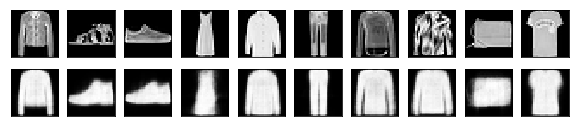

In [7]:
TEST_IMAGES = 10
SHIFT = 10

test_images = train_data.data[SHIFT:TEST_IMAGES+SHIFT].view(-1, 28*28).type(torch.FloatTensor).to(device)

# test_images = torch.randn(10, 784).to(device) # Random noise

encoded_test_images, decoded_test_images = autoencoder(test_images)

print(encoded_test_images[0])
f, a = plt.subplots(2, TEST_IMAGES, figsize=(TEST_IMAGES, 2))

for i in range(TEST_IMAGES):
    a[0][i].imshow(np.reshape(test_images.data.cpu().numpy()[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

for i in range(TEST_IMAGES):
    a[1][i].clear()
    a[1][i].imshow(np.reshape(decoded_test_images.data.cpu().numpy()[i], (28, 28)), cmap='gray')
    a[1][i].set_xticks(()); a[1][i].set_yticks(())